# Step 1: Problem statement

Obesity is a global health concern that needs to be addressed in order prevent future health issues and to save lives.  Our purpose is to build a model that will accurately predict obesity levels based on lifestyle attributes relating to eating habits and physical conditions.   

<b> Facts:</b>
According to the WHO(World health organization), worlwide obesity has nearly tripled since 1975. Most of the world's population live in countries where overweight and obesity kills more people than does malnourishment(WHO). 

For Adults, WHO defines overweight and obesity as follows:
 - overweight is a BMI greater than or equal to 25; and
 - obesity is a BMI greater than or equal to 30


Raised BMI is a major risk factor for noncommunicable diseases such as cardiovascular diseases (leading cause of death in 2012), diabetes and musculoskeletal disorders such as osteoarthritis.  A healthy diet and regular physical activity help people achieve and maintain a healthy weight starting at an early age and continuing throughout life.

## Data Aquisition

https://archive.ics.uci.edu/ml/datasets/Estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition+

Facts about obesity according to WHO (World Health Organization)
https://www.who.int/news-room/fact-sheets/detail/obesity-and-overweight


# Data Dictionary

This is a <b>Structured </b>data source that is supervised (labeled).  We will be using a Classification model. 
Data features are divided into two categories: <b>Eating habits</b> and <b>Physical conditions</b>. Obesity level is measured by NObeyesdad.

<b> Class variables NObeyesdad (Obesity Level)</b>

Attributes related to Obesity level:

1. Insufficient_Weight
2. Normal_Weight
3. Overweight_Level_I
4. Overweight_Level_II
5. Obesity_Type_I
6. Obesity_Type_II
7. Obesity_Type_III

<b> Attributes related with eating habits: </b>
 - Frequent consumption of high caloric food (FAVC)
 - Frequency of consumption of vegetables (FCVC)
 - Number of main meals (NCP)
 - Consumption of food between meals (CAEC)
 - Consumption of water daily (CH20)
 - Consumption of alcohol (CALC)

<b> Attributes related with physical conditions </b>
 - Calories consumption monitoring (SCC)
 - Physical activity frequency (FAF)
 - Time using technology devices (TUE)
 - Transportation used (MTRANS)
 - Gender : Male, Female
 - Age : Interger Numeric Values
 - Height : Interger Numeric Values (Mt) 
 - Weight : Interger Numeric Values (Kg)
 - Family history with overweight (Yes, No)

# Predictive analysis: 

What we hope to achieve with our final analysis is to determine the probability of obesity. We will collect data features from the user as an input form and run our predictive analysis.  The data set included is categorical  so 

<b>Target data: NObesity</b>

NObesity determines levels of obesity: Normal_Weight,Underweight, Overweight_level_1, Overweight_level_2, Overweight_level_3 


 # Feature extraction

Load the data from csv and apply data cleaning techniques such as dropping nulls and importing python packages that will be just for data visualizations and data modeling.

In [42]:
# Import python packages that we are using

import numpy as np # mathematical computations, linear algebra
import pandas as pd # import data libraries, read csv file
import matplotlib.pyplot as plt # interactive visualizations
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import plotly.offline as py
import plotly.express as px
import urllib.request
import zipfile
from sklearn import preprocessing
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import time
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score

In [3]:
# Load dataset, drop nulls, apply logic to column NObeyesdad and create a new column Normal_Weight

df = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv").dropna()

# Add a column 'obese'.  If 'NObeyesdad'= 'Normal_Weight' then obese = False, else true. 

df['Normal_Weight'] = np.where(df['NObeyesdad']!= 'Normal_Weight', False, True)
df.head()
#df.shape
#df.describe()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,Normal_Weight
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,True
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,True
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,True
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,False
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,False


The Pairplot will give us a high-level overview on data features that demonstrate a linear relationship. 

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


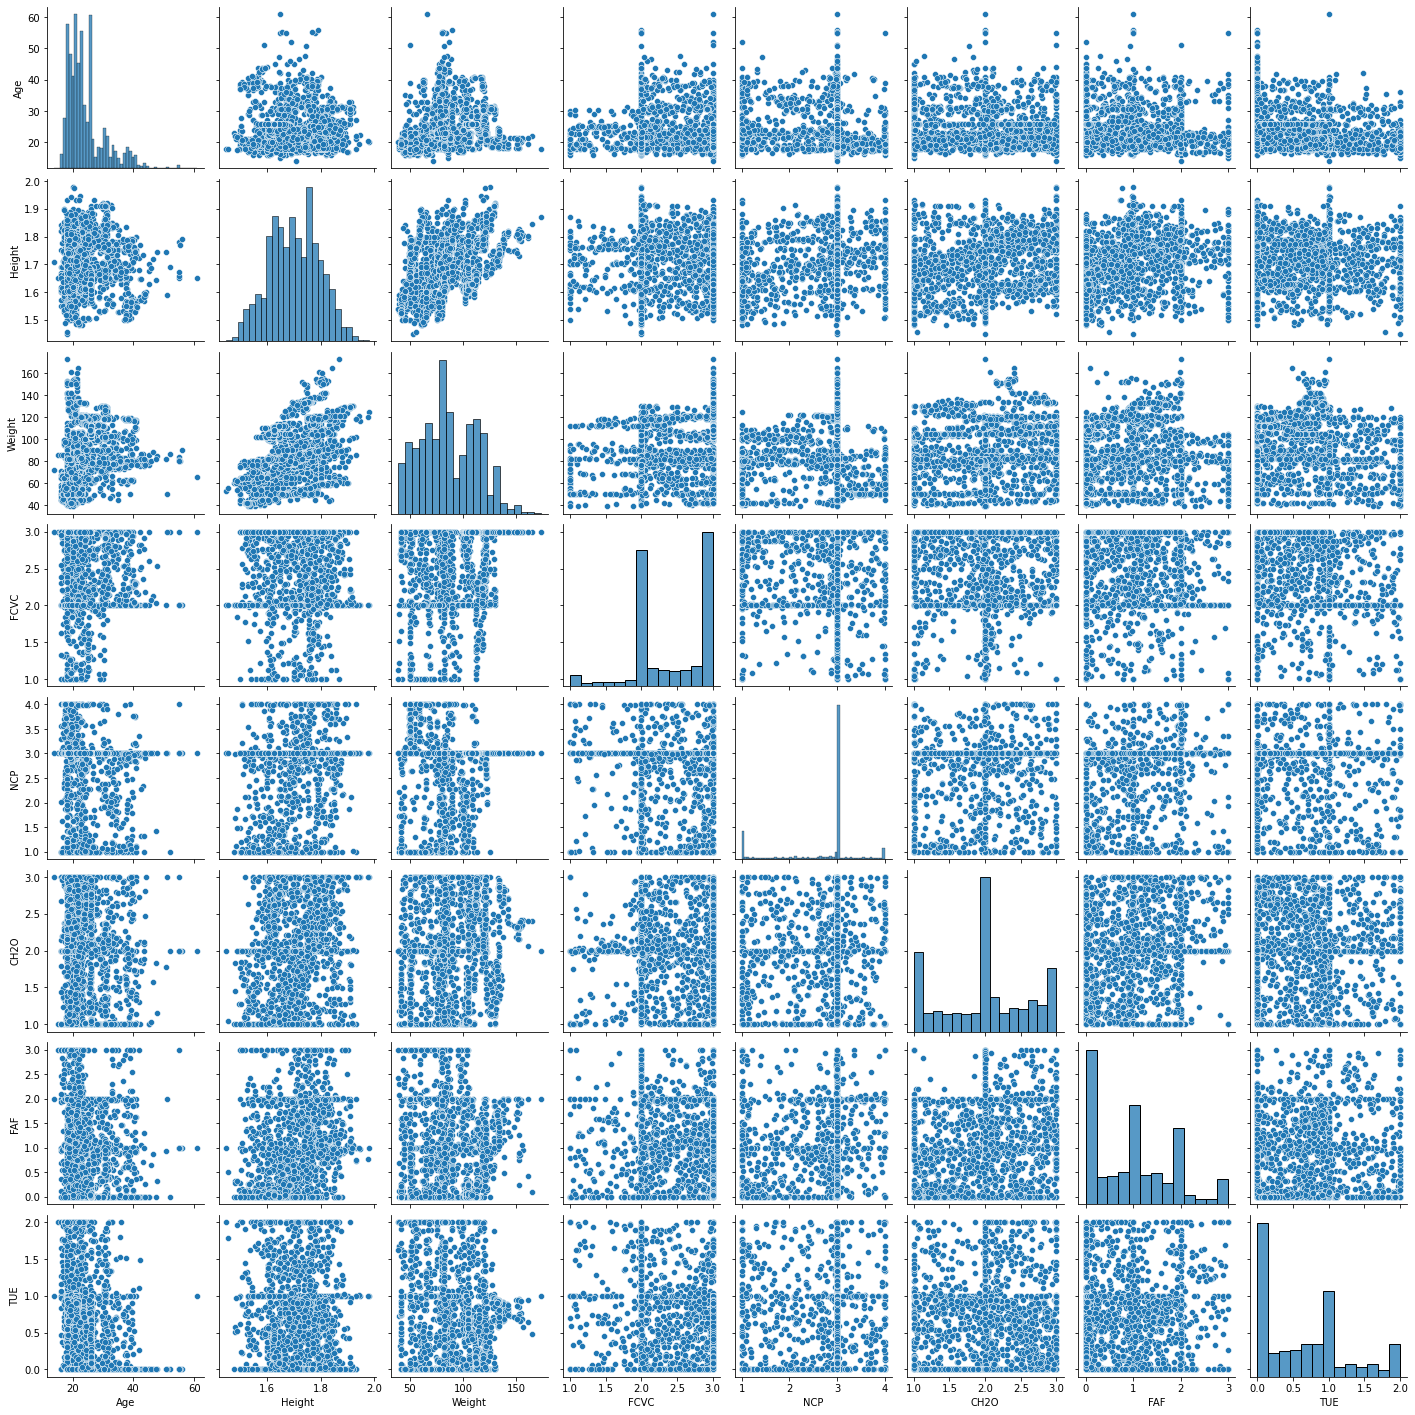

In [4]:
sns.pairplot(df[['Age','Height','Weight','family_history_with_overweight','FCVC','NCP','CH2O','FAF','TUE']])
df.describe()

# Preparing our data for data modeling. We are encoding our lables to numerical and applying a groupby 

In [7]:
le = preprocessing.LabelEncoder()

le.fit(df.Gender)
le.classes_
df['Gender_encoded']=le.transform(df.Gender)

df

categortical_variables = ['Gender','family_history_with_overweight', 'FAVC','CAEC','SMOKE','SCC','CALC','MTRANS','NObeyesdad','Normal_Weight']



for cat in categortical_variables:
    categortical_encoded_variable = cat+'_Encoded'
    print(categortical_encoded_variable)
    le.fit(df[cat])
    df[categortical_encoded_variable] = le.transform(df[cat])

Gender_Encoded
family_history_with_overweight_Encoded
FAVC_Encoded
CAEC_Encoded
SMOKE_Encoded
SCC_Encoded
CALC_Encoded
MTRANS_Encoded
NObeyesdad_Encoded
Normal_Weight_Encoded


In [8]:
print(df.groupby(['Gender','Gender_Encoded']).size().reset_index(name='Freq'))
print(df.groupby(['family_history_with_overweight','family_history_with_overweight_Encoded']).size().reset_index(name='Freq'))
print(df.groupby(['FAVC','FAVC_Encoded']).size().reset_index(name='Freq'))
print(df.groupby(['CAEC','CAEC_Encoded']).size().reset_index(name='Freq'))
print(df.groupby(['SMOKE','SMOKE_Encoded']).size().reset_index(name='Freq'))
print(df.groupby(['SCC','SCC_Encoded']).size().reset_index(name='Freq'))
print(df.groupby(['CALC','CALC_Encoded']).size().reset_index(name='Freq'))
print(df.groupby(['MTRANS','MTRANS_Encoded']).size().reset_index(name='Freq'))
print(df.groupby(['NObeyesdad','NObeyesdad_Encoded']).size().reset_index(name='Freq'))


   Gender  Gender_Encoded  Freq
0  Female               0  1043
1    Male               1  1068
  family_history_with_overweight  family_history_with_overweight_Encoded  Freq
0                             no                                       0   385
1                            yes                                       1  1726
  FAVC  FAVC_Encoded  Freq
0   no             0   245
1  yes             1  1866
         CAEC  CAEC_Encoded  Freq
0      Always             0    53
1  Frequently             1   242
2   Sometimes             2  1765
3          no             3    51
  SMOKE  SMOKE_Encoded  Freq
0    no              0  2067
1   yes              1    44
   SCC  SCC_Encoded  Freq
0   no            0  2015
1  yes            1    96
         CALC  CALC_Encoded  Freq
0      Always             0     1
1  Frequently             1    70
2   Sometimes             2  1401
3          no             3   639
                  MTRANS  MTRANS_Encoded  Freq
0             Automobile          

# Observation:

<b>The target is multinomial or multiclass.</b>
Hence the models should be supporting multinomial.

<b>Two approaches:</b>

<b>OVR </b>- One Vs Rest, and
<b>Multinomial</b> - suitable for multi class.
<b>Our target data is a multi class </b>

Below we will use distplot to have a view on what our data looks like.  What we see below is that the majority of our data is representing a larger group in their 20's and 30's.  This will be our guide to grouping age groups for a better analysis. 

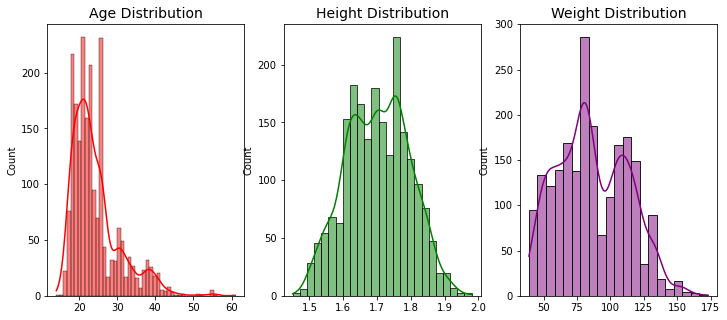

In [11]:
# Visualizations will give us an idea on what the data looks like 
fig , ax = plt.subplots(1,3,figsize = (12,5))

Age = df.Age.values
Height= df.Height.values
Weight = df.Weight.values

sns.histplot(Age , ax = ax[0] , color = 'red', kde = True).set_title('Age Distribution' , fontsize = 14)
sns.histplot(Height , ax = ax[1] , color = 'green', kde = True).set_title('Height Distribution' , fontsize = 14)
sns.histplot(Weight , ax = ax[2] , color = 'purple', kde = True).set_title('Weight Distribution' , fontsize = 14)

plt.show()

In [12]:
def Age_groups(x):
  if x <=29:
    return 'Age<29'
  elif x <= 49:
    return 'Age 30-49'
  elif x <= 65:
    return 'Age 50-65'
 

In [13]:
df['Age_Groups'] = df['Age'].apply(Age_groups)
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,family_history_with_overweight_Encoded,FAVC_Encoded,CAEC_Encoded,SMOKE_Encoded,SCC_Encoded,CALC_Encoded,MTRANS_Encoded,NObeyesdad_Encoded,Normal_Weight_Encoded,Age_Groups
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,...,1,0,2,0,0,3,3,1,1,Age<29
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,...,1,0,2,1,1,2,3,1,1,Age<29
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,...,1,0,2,0,0,1,3,1,1,Age<29
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,...,0,0,2,0,0,1,4,5,0,Age<29
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,...,0,0,2,0,0,2,3,6,0,Age<29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,...,1,1,2,0,0,2,3,4,0,Age<29
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,...,1,1,2,0,0,2,3,4,0,Age<29
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,...,1,1,2,0,0,2,3,4,0,Age<29
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,...,1,1,2,0,0,2,3,4,0,Age<29


In [26]:
le.fit(df['Age_Groups'])
df['Age_Groups_Encoded'] = le.transform(df['Age_Groups'])

/Users/rebekahsilva/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/Users/rebekahsilva/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



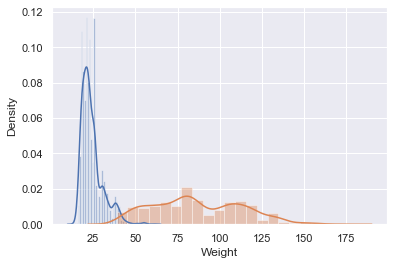

In [27]:
dist_plot_age = sns.distplot(df['Age'])
dist_plot_age = sns.distplot(df['Weight'])
#dist_plot_age = sns.distplot(df['Height'])


In [28]:
round(df['Weight']).unique()

array([ 64.,  56.,  77.,  87.,  90.,  53.,  55.,  68., 105.,  80.,  99.,
        60.,  66., 102.,  78.,  82.,  70.,  50.,  65.,  52.,  76.,  83.,
        62.,  49.,  48.,  67.,  88.,  75.,  72.,  54.,  44.,  58.,  57.,
        69.,  95., 112.,  85.,  45.,  91.,  86.,  93.,  84.,  42.,  63.,
        51.,  61., 109.,  94.,  59., 130.,  79.,  96.,  98.,  74., 118.,
        40.,  71., 100.,  73., 114., 121., 120.,  47.,  81., 115., 107.,
       110., 173.,  97., 125.,  92., 108.,  39., 113.,  89., 104., 127.,
       111., 138., 165., 133., 134.,  43.,  41.,  46., 101., 106., 103.,
       119., 117., 122., 116., 129., 124., 126., 123., 128., 150., 132.,
       152., 131., 142., 153., 136., 139., 156., 137., 141., 144., 149.,
       155., 161., 151., 140., 135., 154., 143., 147.])

# Preparing data for visualization and analysis

/Users/rebekahsilva/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3704: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

/Users/rebekahsilva/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3710: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



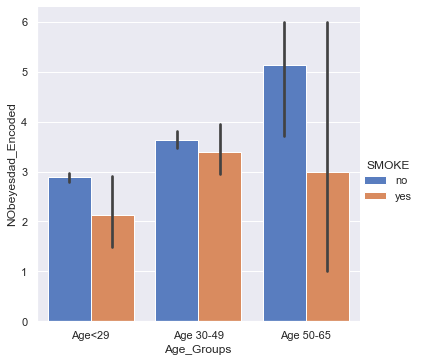

In [29]:
g = sns.factorplot(x='Age_Groups', y='NObeyesdad_Encoded', data=df, hue="SMOKE", size=5, kind='bar', palette='muted')

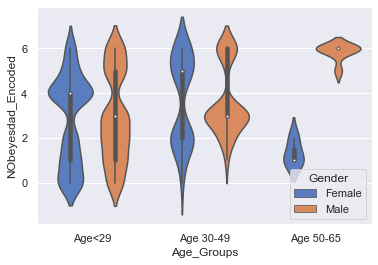

In [30]:
g = sns.violinplot(x='Age_Groups', y='NObeyesdad_Encoded',  hue="Gender",data=df, size=8, kind='bar', palette='muted')

In [31]:
#print(df.NObeyesdad.unique(),df.NObeyesdad_Encoded.unique())
df[df['NObeyesdad_Encoded']==1][['NObeyesdad','NObeyesdad_Encoded']] 

#df.head[df['NObeyesdad_Encoded'==4]][['NObeyesdad','NObeyesdad_Encoded']]



,NObeyesdad,NObeyesdad_Encoded
0,Normal_Weight,1
1,Normal_Weight,1
2,Normal_Weight,1
5,Normal_Weight,1
6,Normal_Weight,1
...,...,...
491,Normal_Weight,1
493,Normal_Weight,1
494,Normal_Weight,1
495,Normal_Weight,1


<b>Distribution of features: Family history, Normal weight, calc (alcohol consumption)</b>

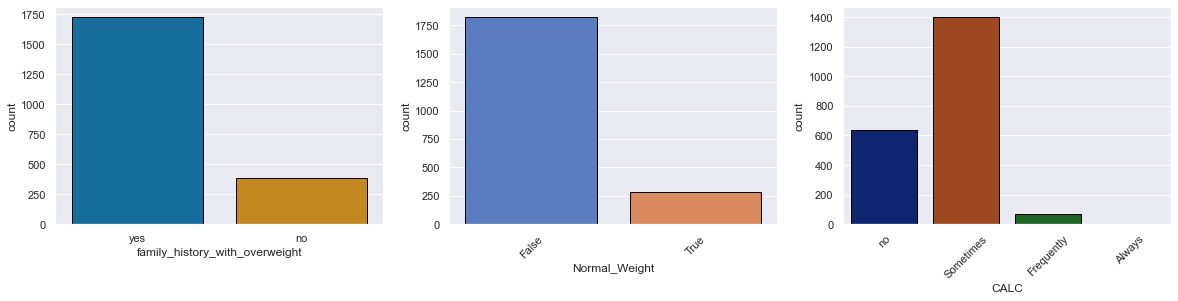

In [32]:
plt.figure(figsize=(20,4))
plt.subplot(131)
sns.countplot(x= 'family_history_with_overweight', data = df, palette="colorblind",edgecolor="black")
plt.subplot(132)
sns.countplot(x= 'Normal_Weight', data = df, palette="muted",edgecolor="black")
plt.xticks(rotation=45)
plt.subplot(133)
sns.countplot(x= 'CALC', data = df, palette="dark",edgecolor="black")
plt.xticks(rotation=45)
plt.show()

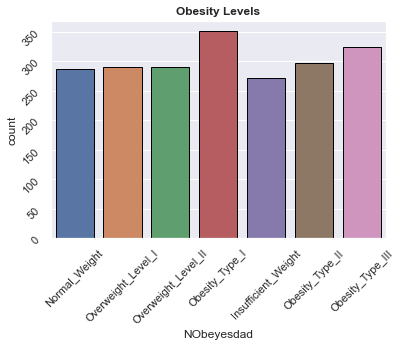

In [33]:
sns.countplot(x="NObeyesdad",data=df,palette="deep",edgecolor="black")
plt.title('Obesity Levels', weight='bold')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
# changing the font size
sns.set(font_scale=1)

# Calories Consumption Monitoring, Food Between Meals against Weight

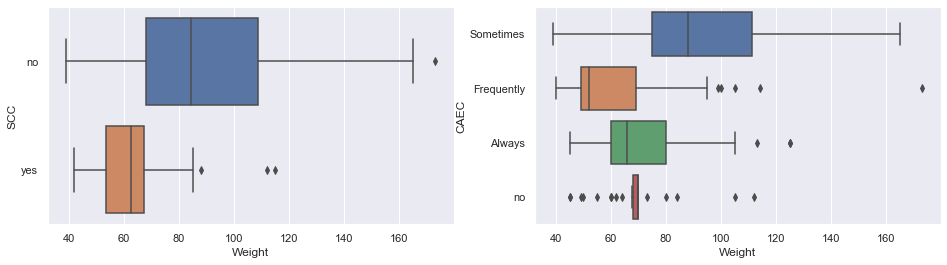

In [34]:
plt.figure(figsize=(16, 4))
plt.subplot(121)
sns.boxplot(x = 'Weight', y = 'SCC', data = df)
plt.subplot(122)
sns.boxplot(x = 'Weight', y = 'CAEC', data = df)
plt.show()

Dropping columns

In [38]:
df_final = df[['Gender_Encoded','Age','Age_Groups_Encoded','Height','Weight','family_history_with_overweight_Encoded','FAVC_Encoded','FCVC','NCP','CAEC_Encoded','SMOKE_Encoded','CH2O','SCC_Encoded','FAF','TUE','CALC_Encoded','MTRANS_Encoded','NObeyesdad_Encoded']].rename({'Gender_Encoded':'Gender_Enc','FAVC_Encoded':'FAVC_Freq_high_caloric_food_Enc','FCVC':'FCVC_Freq_vegetables','NCP':'NCP_Num_main_meals','CAEC_Encoded':'CAEC_Food_between_meals_Enc','SMOKE_Encoded':'SMOKE_Enc','CH2O':'CH2O_Consumption_water_daily','SCC_Encoded':'SCC_Calories_Consumption_Monitoring_Enc','FAF':'FAF_Freq_physical_activity','TUE':'TUE_Time_using_tech_devices','CALC_Encoded':'CALC_Consumption_alcohol_Enc','MTRANS_Encoded':'MTRANS_Transportion_used_Enc','NObeyesdad_Encoded':'Obesity_Levels_Enc'},axis=1,inplace=False)
df_final

,Gender_Enc,Age,Age_Groups_Encoded,Height,Weight,family_history_with_overweight_Encoded,FAVC_Freq_high_caloric_food_Enc,FCVC_Freq_vegetables,NCP_Num_main_meals,CAEC_Food_between_meals_Enc,SMOKE_Enc,CH2O_Consumption_water_daily,SCC_Calories_Consumption_Monitoring_Enc,FAF_Freq_physical_activity,TUE_Time_using_tech_devices,CALC_Consumption_alcohol_Enc,MTRANS_Transportion_used_Enc,Obesity_Levels_Enc
0,0,21.000000,2,1.620000,64.000000,1,0,2.0,3.0,2,0,2.000000,0,0.000000,1.000000,3,3,1
1,0,21.000000,2,1.520000,56.000000,1,0,3.0,3.0,2,1,3.000000,1,3.000000,0.000000,2,3,1
2,1,23.000000,2,1.800000,77.000000,1,0,2.0,3.0,2,0,2.000000,0,2.000000,1.000000,1,3,1
3,1,27.000000,2,1.800000,87.000000,0,0,3.0,3.0,2,0,2.000000,0,2.000000,0.000000,1,4,5
4,1,22.000000,2,1.780000,89.800000,0,0,2.0,1.0,2,0,2.000000,0,0.000000,0.000000,2,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,2,1.710730,131.408528,1,1,3.0,3.0,2,0,1.728139,0,1.676269,0.906247,2,3,4
2107,0,21.982942,2,1.748584,133.742943,1,1,3.0,3.0,2,0,2.005130,0,1.341390,0.599270,2,3,4
2108,0,22.524036,2,1.752206,133.689352,1,1,3.0,3.0,2,0,2.054193,0,1.414209,0.646288,2,3,4
2109,0,24.361936,2,1.739450,133.346641,1,1,3.0,3.0,2,0,2.852339,0,1.139107,0.586035,2,3,4


# Logistic Regression

<b>We are implementing a logistic regression model with the goal of attaining the highest accuracy score possible.</b>

One of the methods we use to improve accuracy score is to drop features that do not have a correlation such as SMOKE and CALC (Consumption of Alcohol) we end with 13 columns/features.

In [43]:
train_data = df_final
target = train_data['Obesity_Levels_Enc']

#keep adding features to the list

features = ['Gender_Enc','Age_Groups_Encoded','Height','Weight', 'family_history_with_overweight_Encoded','FAVC_Freq_high_caloric_food_Enc', 'FCVC_Freq_vegetables','NCP_Num_main_meals','CAEC_Food_between_meals_Enc','CH2O_Consumption_water_daily','SCC_Calories_Consumption_Monitoring_Enc','FAF_Freq_physical_activity','TUE_Time_using_tech_devices']

df_features = train_data[features]
df_features_train, df_features_test, target_train, target_test = train_test_split(df_features, target)
len(features)

13

In [44]:
lr_model = LogisticRegression(dual=False,max_iter=400)
lr_model.fit(df_features_train,target_train)
lr_model.score(df_features_test,target_test)

#max_iter = 300 score 0.7102272727272727
#max_iter = 400 score 0.696969696969697

/Users/rebekahsilva/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



0.8125

In [45]:
lr_model.coef_.shape

(7, 13)

In [46]:
lr_model.coef_

array([[ 2.71739147e+00,  2.48268457e+00,  6.73887900e+00,
        -4.96200056e-01, -3.23502424e-02,  1.61772508e+00,
         2.19277548e+00,  1.57554082e+00,  4.72894768e-01,
         7.67890104e-01, -4.85261562e-01,  2.66696266e-01,
         2.65058957e-01],
       [ 1.90588946e+00,  3.23550979e-01,  5.78908769e+00,
        -2.30157535e-01,  4.79047222e-02,  8.33864275e-01,
         4.47403501e-01,  3.72910900e-01, -3.76538501e-02,
         2.62460906e-01,  6.75331176e-01,  5.37397459e-01,
         5.18750418e-02],
       [-1.09934767e+00, -6.76464956e-01, -3.42483109e+00,
         1.45646288e-01,  1.07074766e+00,  3.79227126e-01,
        -1.15974497e+00, -3.63637407e-01,  1.60064475e-01,
         3.50986591e-01, -1.03524951e-01,  2.18809453e-01,
         1.45611415e-01],
       [ 7.22624184e-01, -9.92563370e-01, -7.05888888e+00,
         3.24828194e-01, -5.09000098e-01, -2.14935564e+00,
        -8.21599745e-01, -5.02510664e-01, -3.04395369e-01,
        -1.56221806e+00, -6.41657400e

<b>Fine-tuning to find the best accuracy score we utilized hyper-parameters such as solver gridSearch and solver 'newton-cg'</b>

In [47]:
dual=[True,False]
max_iter=[1, 10, 20, 40, 80, 100,110,120,130,140,200,300,400]

param_grid = dict(dual=dual,max_iter=max_iter)

log_sci_model = LogisticRegression()
grid = GridSearchCV(estimator=log_sci_model, param_grid=param_grid, cv = 3, n_jobs=-1)


X = df_features_train
y = target_train

start_time = time.time()
grid_result = grid.fit(X, y)
# Summarize results


print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Best: 0.783950 using {'dual': False, 'max_iter': 400}
Execution time: 4.480004787445068 ms


/Users/rebekahsilva/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [48]:
solver = ['newton-cg', 'lbfgs', 'sag', 'saga' ]
penalty=['l1','l2']
C = np.linspace(0.1, 1.0, num=5)

param_grid = dict(max_iter=max_iter, solver=solver, C=C, penalty=penalty)

l1_ratio = np.linspace(0, 1.0, num=20)
log_sci_model = LogisticRegression(multi_class='multinomial')
grid = GridSearchCV(estimator=log_sci_model, param_grid=param_grid, cv = 3, n_jobs=-1)

X = df_features_train
y = target_train

start_time = time.time()
grid_result = grid.fit(X, y)
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')


Best: 0.819337 using {'C': 1.0, 'max_iter': 40, 'penalty': 'l2', 'solver': 'newton-cg'}
Execution time: 35.314594984054565 ms


/Users/rebekahsilva/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning:

newton-cg failed to converge. Increase the number of iterations.



In [49]:
lr_model = LogisticRegression(multi_class='multinomial', penalty='l2',max_iter = 40,C= 1.0,solver= 'newton-cg' )
lr_model.fit(df_features_train,target_train)
lr_model.score(df_features_test,target_test)

/Users/rebekahsilva/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning:

newton-cg failed to converge. Increase the number of iterations.



0.8257575757575758

# Support Vector Classification

In [50]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

#Data Processing
X = df_features_train
y = target_train

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =.20)

In [51]:
# Training the algorithm
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(kernel='linear')

In [52]:
#Predicting classes
y_pred= svclassifier.predict(X_test)
print(y_pred)

[1 2 4 6 5 0 0 4 2 6 5 2 0 0 5 0 3 2 1 2 0 6 3 4 1 5 4 0 3 2 6 5 4 1 2 2 3
 2 1 0 4 2 4 0 6 1 6 1 2 6 2 2 1 2 2 6 0 2 4 5 0 0 0 1 2 1 5 2 5 2 0 2 3 1
 5 4 3 5 3 5 0 6 0 6 3 4 1 2 4 6 6 5 4 2 3 0 0 1 3 3 2 6 0 5 4 6 3 3 0 4 6
 1 4 2 2 5 4 5 3 3 4 5 0 2 6 2 4 0 4 6 5 3 0 2 6 6 6 6 3 4 2 3 2 5 3 2 5 0
 6 4 0 1 1 5 1 4 5 2 1 5 4 5 3 5 3 3 3 1 2 2 5 0 4 2 1 4 4 6 3 6 3 2 1 0 4
 4 2 0 4 2 4 3 2 3 3 5 5 4 5 3 5 1 0 2 4 3 5 3 4 5 2 4 4 6 2 1 3 4 4 5 4 3
 1 3 2 2 4 2 5 2 3 2 4 1 6 3 5 5 2 4 3 3 0 2 4 1 3 2 2 5 5 4 0 3 2 5 0 3 3
 3 0 0 5 6 6 1 2 0 0 5 6 0 0 1 4 4 5 1 2 5 5 5 2 1 5 0 0 5 0 6 5 1 3 5 3 0
 1 4 4 1 6 6 2 4 4 6 0 2 5 3 2 5 3 4 5 2 1]


In [53]:
svc_acc =accuracy_score(y_test,y_pred)

print("Accuracy for support vector machine is {:.2f}%".format(svc_acc*100))

Accuracy for support vector machine is 84.86%


In [54]:
#Evaluate the model
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.97      0.87        35
           1       0.88      0.60      0.71        50
           2       0.95      0.90      0.93        62
           3       0.94      1.00      0.97        44
           4       1.00      0.98      0.99        51
           5       0.65      0.80      0.72        41
           6       0.67      0.65      0.66        34

    accuracy                           0.85       317
   macro avg       0.84      0.84      0.83       317
weighted avg       0.86      0.85      0.85       317

